# Tarea 2

**Envío del PR inicial: 07.09.2018**

**Aceptación del PR: 14.09.2018**

## 1

Extiendan los operadores `+`, `-`, `*` y `/` para que funcionen cuando una de las dos entradas es un `Dual` y la otra es un `Real` (número cualquiera), sin importar el orden.

In [2]:
"""
    Dual

Definición de los números duales. Los campos internos son
    x  :: Float64   # valor de la función
    x′ :: Float64   # valor de su derivada

"""
struct Dual
    x  :: Float64
    x′ :: Float64
end

Dual(c::Real) = Dual(c, 0.0)
dual(x0::Real) = Dual(x0, 1.0)

dual (generic function with 1 method)

In [3]:
# Importamos la definición de los siguientes operadores
import Base: +, -, *, /, ^

+(u::Dual, v::Dual) = Dual( u.x + v.x, u.x′ + v.x′)

-(u::Dual, v::Dual) = Dual( u.x - v.x, u.x′ - v.x′)

*(u::Dual, v::Dual) = Dual( u.x * v.x, u.x * v.x′ + u.x′ * v.x)

function /(u::Dual, v::Dual)
    y = u.x / v.x
    Dual( y, (u.x′ - y * v.x′)/v.x )
end

function ^(a::Dual, n::Int)
    y = a.x^(n-1)
    Dual(a.x * y, n*y*a.x′)
end

^ (generic function with 53 methods)

In [4]:
#+
+(a::Real, u::Dual) = Dual( a + u.x, u.x′)
+(u::Dual, a::Real) = Dual( a + u.x, u.x′)
#-
-(a::Real, u::Dual) = Dual( a - u.x, -u.x′)
-(u::Dual, a::Real) = Dual( u.x - a, u.x′)
#*
*(a::Real, u::Dual) = Dual(u.x*a,u.x′*a)
*(u::Dual, a::Real) = Dual(u.x*a,u.x′*a)
#/
function /(a::Real,u::Dual)
    y = a / u.x
    Dual( y, (-y * u.x′)/u.x )
end
/(u::Dual, a::Real)=Dual( u.x/a, u.x′/a )

/ (generic function with 76 methods)

In [5]:
Dual(-1,0)/Dual(2,5)

Dual(-0.5, 1.25)

## 2

Construyan 2 tests para cada una de las operaciones aritméticas definidas para los `Dual`es, incluyendo las que definieron en el ejercicio 1.

In [6]:
using Base.Test

In [7]:
#+
@test Dual(1,2)+Dual(-1,-2) == Dual(0.0)
@test Dual(1,2)+Dual(1,2) == Dual(2,4)

@test 1+Dual(1,1) == Dual(2,1)
@test -0.5+Dual(1,0)==Dual(.5,0)
@test Dual(0,1)+5.0==Dual(5,1)
@test Dual(-1,-1)+1==Dual(0,-1)
#-
@test Dual(1,2)-Dual(-1,-2) == Dual(2,4)
@test Dual(1,2)-Dual(1,2) == Dual(0)

@test 1-Dual(1,1) == Dual(0,-1.0)
@test -0.5-Dual(1,0)==Dual(-1.5,-0.0)
@test Dual(0,1.1)-5==Dual(-5,1.1)
@test Dual(-1,-1)-1==Dual(-2,-1)
#*
@test Dual(2,3)*Dual(2,3) == Dual(4,12)
@test Dual(2,-5)*Dual(2,5) == Dual(4,0)

@test 2*Dual(3,5)==Dual(6,10)
@test -3.3*Dual(2,-1)==Dual(-6.6,3.3)
@test Dual(5,2)*1==Dual(5,2)
@test Dual(2,3)*-6==Dual(-12,-18)
#/
@test Dual(2,2)/Dual(0.5,0.5)==Dual(4,0)
@test Dual(6,-6)/Dual(2,3)==Dual(3,-7.5)

@test 6/Dual(3,3)==Dual(6,0)/Dual(3,3)
@test -1/Dual(2,5)==Dual(-0.5,1.25)
@test Dual(1,-2)/4==Dual(0.25,-0.5)
@test Dual(-1,1)/0==Dual(-Inf,Inf)
#^
@test Dual(2,2)^2==Dual(2,2)*Dual(2,2)
prueba=1
for i in 1:10
    prueba=prueba*Dual(2,-3)
end
@test Dual(2,-3)^10==prueba

Test Passed

## 3

Sobrecarguen la función `show` (que está en Base) para que cuando se impriman los duales aparezcan con la notación $\varepsilon$ que usamos al principio de este notebook, por ejemplo, el resultado de `Dual(1,2)` debe ser parecido a `1.0 + 2.0 ε`.

In [8]:
import Base.show
function show(u::Dual)
    print(string(u.x)*" + "*string(u.x′)*"ε")
end

show (generic function with 271 methods)

In [9]:
u=Dual(1.0,2)
show(u)

1.0 + 2.0ε

## 4

Obtengan la derivada de 
$$g(x) = \frac{3x^2-8x+5}{7x^3-1}$$
en $x_0=1$.

In [10]:
g(x)=(3*x^2-8*x+5)/(7*x^3-1)
y=dual(1)
g(y)

h(x)=(-21*x^4+112*x^3-105*x^2-6*x+8)/((7*x^3-1)^2)
z=Dual(0.0,h(1))

@test g(y)==z

Test Passed

## 5

- Recordando la regla de la cadena(!!!), extiendan el usar los `Dual` a las funciones `sqrt`, `exp`, `log`, `sin`, `cos`, `sinh` y `cosh`. 

- Muestren que las cosas dan los resultados que esperan usando pruebas como hicieron en el ejercicio 2.

- Calculen la derivada de $h(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$ en $x_0 = 2$. ¿Qué tan preciso es el resultado?(Pueden usar cualquier otra manera de obtener el resultado correcto, sólo tienen que ser claros en la explicación.)

- Dibujen, para $x_0 \in [1,5]$ la función $h'(x)$.

In [41]:
#Extensión de los Dual a diferentes funciones
import Base: sqrt, exp, log, sin, cos, sinh, cosh

sqrt(u::Dual)=Dual(sqrt(u.x),u.x′/(2*sqrt(u.x)))
exp(u::Dual)=Dual(exp(u.x),u.x′*exp(u.x))
log(u::Dual)=Dual(log(u.x),u.x′/u.x)
sin(u::Dual)=Dual(sin(u.x),u.x′*cos(u.x))
cos(u::Dual)=Dual(cos(u.x),-u.x′*sin(u.x))
sinh(u::Dual)=Dual(sinh(u.x),u.x′*cosh(u.x))
cosh(u::Dual)=Dual(cosh(u.x),u.x′*sinh(u.x))

cosh (generic function with 12 methods)

In [31]:
c=Dual(1,1)
exp(c)

Dual(2.718281828459045, 2.718281828459045)

In [48]:
#sqrt
@test sqrt(Dual(4,2))==Dual(2,0.5)
@test sqrt(dual(8))==Dual(sqrt(8),1/(2*sqrt(8)))

#exp
@test exp(dual(1))==Dual(e,e)
@test exp(Dual(log(1),5))==Dual(1,5)

#log
@test log(dual(e^-5))==Dual(-5,e^5)
@test log(Dual(5,5))==Dual(log(5),1)

#sin
@test sin(dual(pi/4))==Dual(sin(pi/4),cos(pi/4))
@test sin(Dual(0,5))==Dual(0,5)

#cos
@test cos(dual(pi/5))==Dual(cos(pi/5),-sin(pi/5))
@test cos(Dual(0,5))==Dual(1,-0.0)

#sinh
@test sinh(dual(1))==Dual(sinh(1),cosh(1))
@test sinh(Dual(-5,5))==Dual(sinh(-5),5*cosh(-5))

#cosh
@test cosh(dual(2))==Dual(cosh(2),sinh(2))
@test cosh(Dual(3,0.1))==Dual(cosh(3),sinh(3)/10)

Test Passed

$h(x)=sen\left( x^3-\frac{2}{x^6}\right) \Rightarrow$

$h'(x)=cos\left( x^3-\frac{2}{x^6}\right)\left(3x^2+\frac{12}{x^7}\right)$

In [20]:
h(x)=sin(x^3-2*x^-6)
hprime(x)=cos(x^3-2*x^-6)*(3*x^2+12*x^-7)
hprime(BigFloat(2))

-1.38493490552346401014325810163217243753408908130493859521344787249402587663295

$\therefore  h'(2)\equiv -1.38493490552346401014325810163217243753408908130493859521344787249402587663295$

Mediante los duales obtendremos:

In [26]:
h(dual(2)).x′

-1.384934905523464

Todas las cifras obtenidas mediante el dual coinciden con las cifras obtenidas directamente por la derivada explícita.

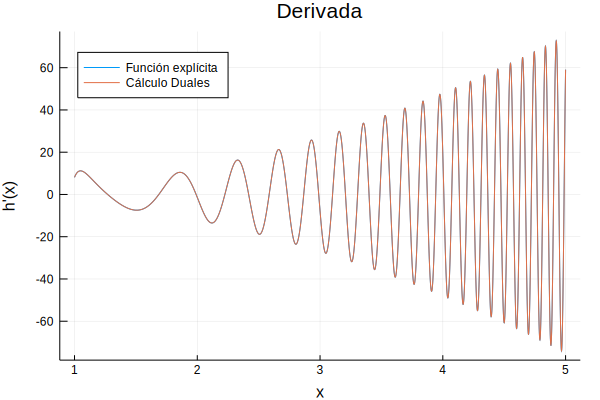

In [69]:
using Plots


x=1:0.5^10:5
g(x)=h(dual(x)).x′

plot(x,g,label="Función explícita",legend=(:topleft),xaxis="x",yaxis="h'(x)",title="Derivada")
plot!(x,hprime,label="Cálculo Duales")

## 6

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable, explotando el uso de los `Dual`. 

- Obtengan, usando su función para el método de Newton, las raices del polinomio de Wilkinson 

$$
W_{6}(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6),
$$ 

usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [13]:
"Método de Newton con Duales"
function newton(f,x0,tol=1e-10)
    fprime(x)=f(dual(x)).x′
    xn=x0
    while abs(f(xn))>tol
        xn=xn-f(xn)/fprime(xn)
    end
    return xn
end

newton

In [14]:
W6(x)=(x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)
show(newton(W6,2.2))
println()
show(newton(W6,2.45))
println()
g(x)=x*sin(2*x)
show(newton(g,0.7))

2.0
6.000000000000067
4.086255907155701e-6

## 7

Argumenten qué podrían hacer para extender la idea de los `Dual` y calcular derivadas aún más altas. Como caso concreto, piensen en querer obtener la derivada 18 de funciones como las que hemos usado arriba

Una manera sería crear una nueva estructura y definir operaciones para esta estructura como se hizo para el Dual; para cada orden de derivada; sin embargo la complejidad de las operaciones comienza a crecer demasiado.

Otro método podría ser definir las series de Taylor para cada función, generando un vector, y generalizar las reglas del Dual para cada orden de derivada; como se muestra a continuación con el esboso de lo que se realizaría con un exponente:

In [15]:
"""
Taylor100 es una estructura que alberga la expanción en Taylor de orden 99, y el orden de la derivada.
"""
struct Taylor100
    a ::Array{Any,1}
    y ::Int64
end

Taylor100(a::Array{Any,1}) = Taylor100(a,0)

function taylor100(a::Float64)
    o=[]
    push!(o,a)
    for i in 1:99
        push!(o,0)
        end
    return Taylor100(o)
end

#Extendemos el operador exponente.
function ^(x::Taylor100,n::Int)
    o=[]
    for i in 0:99
        if i≠n
            push!(o,0)
        else
            push!(o,x.a[1])
        end
    end
    return Taylor100(o)
end

"Deriva la serie de Taylor perdiendo el término de mayor orden."
function derivartaylor(x)
    m=x.a
    k=[]
    deleteat!(m,1)
    for i in 1:99
        push!(k,m[i]*i)
    end
    push!(k,0)
    z=Taylor100(k)
    return z
end

#Extendemos el Dual.
Dual(x::Taylor100)=Dual(sum(x.a),sum(derivartaylor(x).a))


#Este es un ejemplo.
x=taylor100(1.0)

x=x^5
x1=derivartaylor(x)
x2=derivartaylor(x1)
m=Dual(x2)

Dual(20.0, 60.0)

Sin embargo, como podemos apreciar; éste método puede ser lento al tener que definir las series de Taylor para cada función; además de perder información y propagar el error por cada derivación sobre la función original.

Sin embargo, podemos extender este concepto de la expanción en Taylor de una manera más generalizada; de modo que extendamos el campo de los duales donde a cada orden de derivada le corresponde un dual; entonces, a partir del punto en que se evalúa la función y los duales de ordenes inferiores, se puede obtener el próximo orden. Es decir, que podríamos obtener el valor de $ε_{18}$ con los valores de $x_0, ε_i$ con $i=1,2...17$; pero la complejidad para obtener estas derivadas comienza a aumentar con el orden.